<a href="https://colab.research.google.com/github/aishwarya-raman/ML/blob/main/ML_Regression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims Charges Prediction

Download dataset

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-29 16:08:00--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2023-12-29 16:08:01 (4.76 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [2]:
#import basic libraries
import numpy as np #linear algebra
import pandas as pd #data processing, CSV fileI/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()



In [3]:
#Read the Data
df = pd.read_csv('./insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [4]:
# Descriptive stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visulizations

In [6]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Age vs Charges')

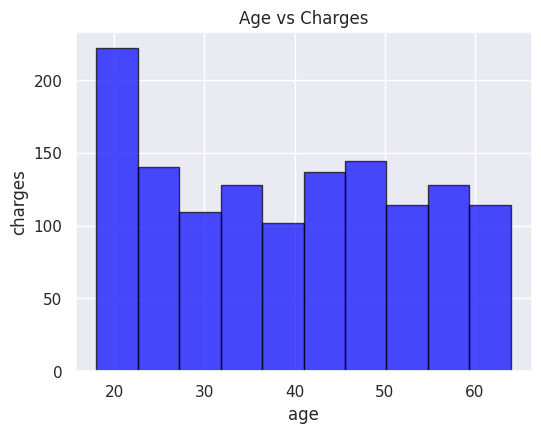

In [7]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='blue', edgecolor='black', alpha = 0.7)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')


Text(0.5, 1.0, 'Sex vs Charges')

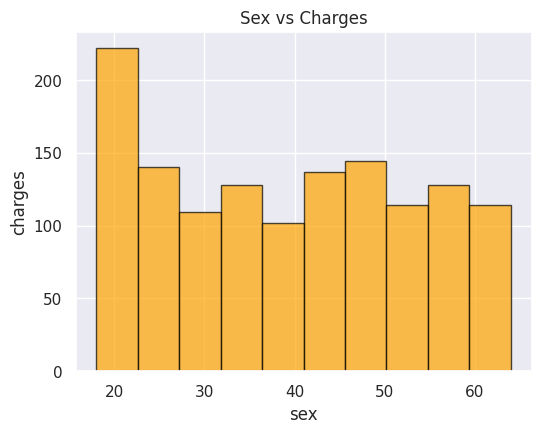

In [8]:
# sex vs charges
# males insurance charges more than females.
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='orange', edgecolor='black', alpha = 0.7)
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

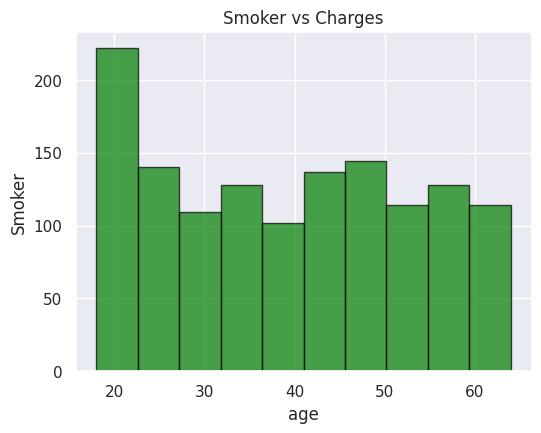

In [9]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='green', edgecolor='black', alpha = 0.7)
plt.xlabel('age')
plt.ylabel('Smoker')
plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'region vs Charges')

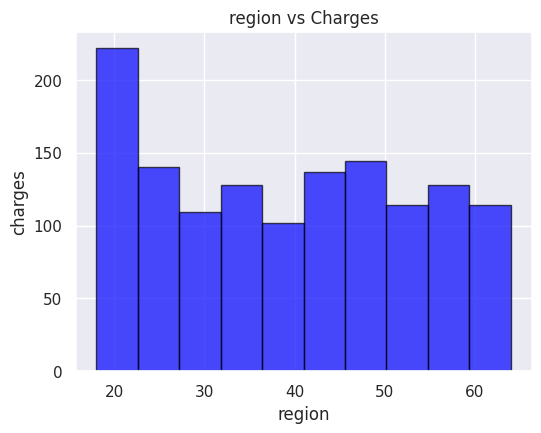

In [10]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='blue', edgecolor='black', alpha = 0.7)
plt.xlabel('region')
plt.ylabel('charges')
plt.title('region vs Charges')

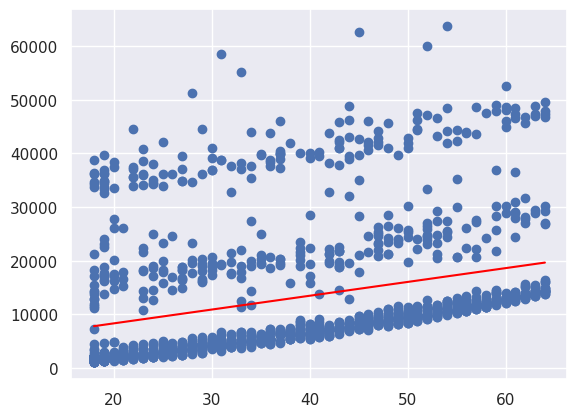

In [11]:
# plotting the correlation plot for the dataset
x = df['age']
y = df['charges']
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

##STEP-3:Data Preprocessing / Clean the Data


In [59]:
# removing unnecassary columns from the dataset
df.head()

print(df.shape)
df.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [60]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
df[['sex', 'smoker']] = df[['sex', 'smoker']].apply(LabelEncoder().fit_transform)
df[['sex', 'smoker']]


,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


In [61]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [62]:
df['sex'].value_counts()
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [63]:
#Selecting Independent (Features) & Dependent(Target) variables
# Import the necessary libraries first
X = df.drop(columns=['charges'])
X.head()


,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [64]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
803,18,0,42.24,0,1
16,52,0,30.78,1,0
949,25,1,29.70,3,1
997,63,0,36.85,0,0
222,32,1,30.80,3,0


In [65]:
print(Y.shape)
Y.head(5)

(1338,)


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting the dataset into the Training set and Test set

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 1)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [68]:
df.head(5)

print(df.shape)
df.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

##STEP-4 : Fit the Model & Predict , check the Accuracy

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train,Y_train)

# predicting the test set results
Y_pred = lrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(Y_test, Y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(Y_test, Y_pred)
print('R2 :', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2 : 0.760858175073853


##Support Vector Machine

In [71]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, Y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(Y_test, Y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(Y_test, Y_pred)
print('R2 :', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2 : 0.760858175073853


##Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  38506171.79351441
RMSE:  6205.334140359761
R2 : 0.7420551526703485


##Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  18821973.15219283
RMSE:  4338.429802612096
R2 : 0.8739155110713209


Compare and evaluate the Model results and find the best model